In [1]:
1+1234

1235


# Summary

# Summary: usecase sales dashboard with Jupyter Dash


<p>
<b>Notice:</b><br>
A live version is deposited on Binder.<br>
"Binder allows you to create custom computing environments that can be shared and used by many remote users."<br>
This allows to see the Dash apps create in the notebooks locally in your browser.<br>
Jumpt directly to Binder for running the code of the repository:
<a href="https://mybinder.org/v2/gh/RolfChung/usecase_sales_dashboard_plotly_dash/HEAD" target="_blank">usecase_sales_dashboard</a> 
</p>

<p>
Dash made a great job bringing Dash to Jupyter.<br>
Normally you would develop and start Dash from an IDE and the command line.<br>
As this project is a demonstration of Dash capabilities JupyterDash was chosen.<br>
The JupyterDash has different modes of presentation: inline, jupyter lab, external.<br>
The repository here uses inline and external.<br>
In external mode a link is created at the end of the notebook. This outputsthe Dash app into a website.<br>
However Github does not allow to start Dash apps from notebooks right now.<br>
That is a reason a Binder version of this repository was created.<br>
One last word: <b>Dash needs Javascript to be installed on the machine to work.</b>
</p>

<p>
This is a use case for Plotly Dash.<br>
It creates a sales dashboard for world wide e-commerce data.<br>
According to Wordnik a dashboard is <br>
"a user interface on a computer display that presents constantly updated information, such as processing speed, in a format that resembles the dashboard of a vehicle."<br>
This sales dashboard is intuitively understandable.    
<p>

<p>
On a technical level this project applies Plotly and JupyterDash for data visualization and web deployment.<br>
It is also applying HTML and CSS to structure and style the dashboard.
</p>

<p>
This notebook is part of larger project consisting of a portfolio of notebooks testing out different versions of the sales dashboard.<br>
It brings the darkmode style to life and display the plot side by side.<br>
There is also a dedicated notebook for importing and cleaning the data.<br>
The cleaned data can immediately used in the JupyterDash notebooks.<br>
It is followed up by another project adding interactivity to the sales dashboard.<br>
Then users can get particular information by sliding or klicking on graphic elements.<br>
</p>



<hr width=”300″, size=5> 

# Importing packages

In [2]:
# Base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import os
import warnings

### Plotly

In [3]:
import ipywidgets

In [4]:

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# plotly.offline.init_notebook_mode(connected=True)

# plotly
import plotly
import plotly.express as px
# plotly.tools.set_credentials_file(username = 'lathkar', api_key = '************')


# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import plotly.io as pio

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
import plotly.offline as pyo
#pyo.init_notebook_mode()

#import plotly.io as pio
# print(pio.renderers)

pio.renderers.default = 'jupyterlab'


plotly.offline.init_notebook_mode(connected=True)

#### Checking current working directory

In [5]:
# print(os.getcwd())

%%cmd
dir

### Color palettes

In [6]:
# fig = px.colors.qualitative.swatches()
# fig.show()

<hr width=”300″, size=5> 

## Dash

In [7]:
import dash
import dash_core_components as dcc
import dash_html_components as html


from dash.dependencies import Input, Output


# from dash import dcc
# import dash_core_components as dcc - depreciated
# from dash import html
# import dash_html_components as html - depreciated

## Jupyter Dash

<p>
<b>"Introducing JupyterDash</b>

"We’re excited to announce the release of JupyterDash, our new library that makes it easy to build Dash apps from Jupyter environments (e.g. classic Notebook, JupyterLab, Visual Studio Code notebooks, nteract, PyCharm notebooks, etc.)."<br>
<a href="https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e" target="_blank">Medium</a>
</p>



In [8]:
from jupyter_dash import JupyterDash

#### Checking current working directory

In [9]:
# %%cmd
# cd

cwd=os.getcwd()
# print(cwd)

In [10]:
#### Checking versions

!python --version
!conda --version

print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Seaborn {}".format(sns.__version__))
print("Plotly {}".format(plotly.__version__))
print("Dash {}".format(dash.__version__))

Python 3.10.0
conda 4.12.0
Pandas: 1.4.1
Numpy: 1.21.5
Seaborn 0.11.2
Plotly 5.6.0
Dash 1.19.0


### Creating an requirements file

In [11]:
%%capture
%%cmd 
mkdir txt

In [12]:
!conda list > txt/requirements_dash_dashboards_coreApp.txt
!jupyter --version > txt/jupyter_version_coreApp.txt

# Importing the data

In [13]:
revenue_topten = \
pd.read_csv("csv/cleaned_df/revenue_topten.csv")

In [14]:
revenue_topten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_month  111 non-null    object 
 1   Country     111 non-null    object 
 2   revenue     111 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [15]:
total_sales_gb_month =\
pd.read_csv("csv/cleaned_df/total_sales_gb_month.csv")

total_sales_gb_month.head()

,Year-Month,Total_Sales ($)
0,2011-11-01,2553.74
1,2011-05-01,2394.34
2,2011-09-01,2339.75
3,2011-08-01,2327.19
4,2011-03-01,2324.19


In [16]:
categories = pd.read_csv("csv/cleaned_df/categories.csv", index_col=0)
categories.head(2)

,Major_Category,Minor_Category,Total_Orders
1,Clothes,Tops,63
2,Clothes,Shoes,57


<p>
This subsets are used for notations later in the plots.
</p>

In [17]:
top_minor_category,  top_minor_category_orders = \
categories.iloc[0, 1:3].tolist()

second_minor_category,  second_minor_category_orders = \
categories.iloc[1, 1:3].tolist()

print(top_minor_category)
print(top_minor_category_orders)
# print(second_minor_category)
# print(second_minor_category_orders)

Tops
63


In [18]:
major_categories_log = pd.read_csv("csv/cleaned_df/major_category_log.csv", index_col=0)
major_categories_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Major_Category  4 non-null      object 
 1   Total_Orders    4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 96.0+ bytes


# Single plots
<p>
for prebuilding the Plotly graphs later used the dashboard Jupyter Dash app.<br>
(Jupyter) Dash works hand in hand with Plotly.<br>
Plotly plots are used and integrated into the Dash web app.
</p>

### Total sales by month

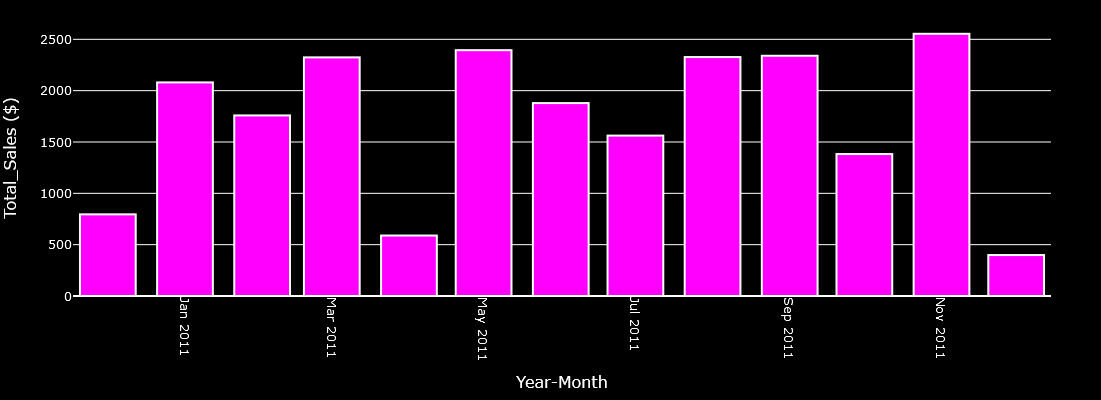

In [19]:


fig_sales_gb_month = \
px.bar(data_frame=total_sales_gb_month, x='Year-Month', y='Total_Sales ($)',
       color_discrete_sequence=["magenta"], width=600, height=400)

fig_sales_gb_month.update_traces(marker_line_width=2, marker_line_color='black')
fig_sales_gb_month.update_layout({'plot_bgcolor':'black', 'paper_bgcolor':'black',
                                  'font':{'color':'white', 'size':13},
                                  'margin':{'l':50, 'r':50, 'b':20, 't':20}})

fig_sales_gb_month.update_traces(marker_line_width=2,marker_line_color="white")

fig_sales_gb_month.update_xaxes(tickangle=90)

# Setting the margins and thereby cutting the paper bg, 
# makes it easier to set the margins within the Dash app below

#fig_sales_gb_month.show()




### Total sales by country

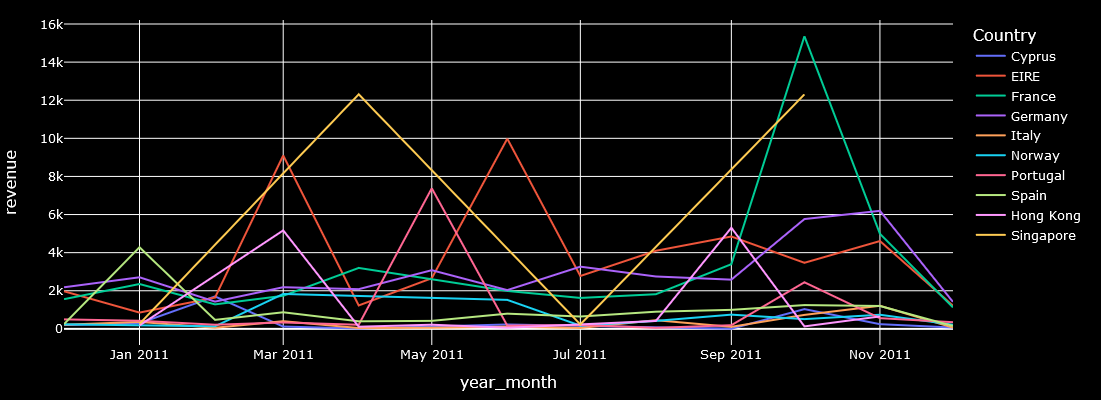

In [20]:
top_ten_revenue_fig = \
px.line(data_frame=revenue_topten, x='year_month', y='revenue', color='Country', width=600, height=400)

top_ten_revenue_fig.update_layout({"paper_bgcolor":"black", "plot_bgcolor":'black',
                                   "font":{'color':'white', 'size':13},
                                   'margin':{'l':50, 'r':50, 'b':20, 't':20}})

       
# top_ten_revenue_fig.show()

### Total order by minor categories

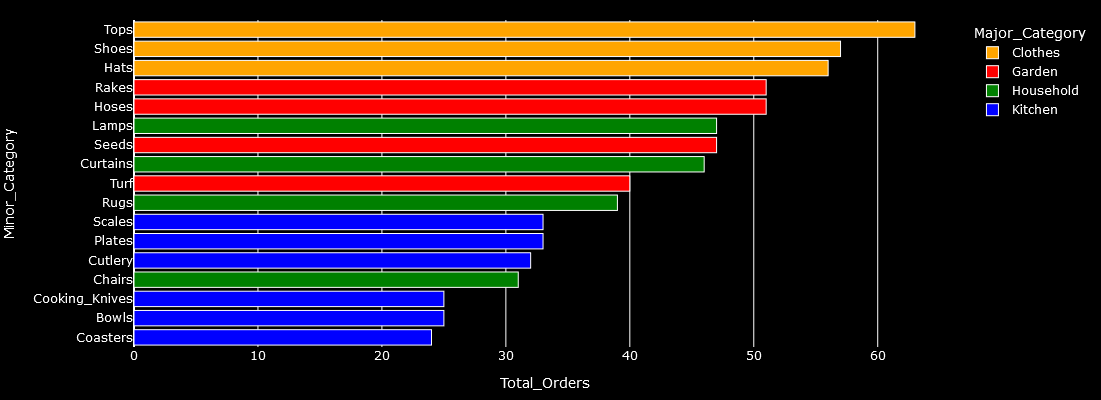

In [21]:
categories_fig = \
px.bar(categories, x='Total_Orders', y='Minor_Category', color='Major_Category',
      color_discrete_sequence=["orange", "red", "green", "blue"],width=600, height=400)

categories_fig.update_layout({'yaxis':{'dtick':1, 'categoryorder':'total ascending'},
                              'plot_bgcolor':'black', 'paper_bgcolor':'black',
                              'font':{'color':'white', 'size':12},
                               'margin':{'l':50, 'r':50, 'b':20, 't':20}}) 

categories_fig.update_traces(marker_line_width=1, marker_line_color="white")

categories_fig.show()

### Total order sum by major categories

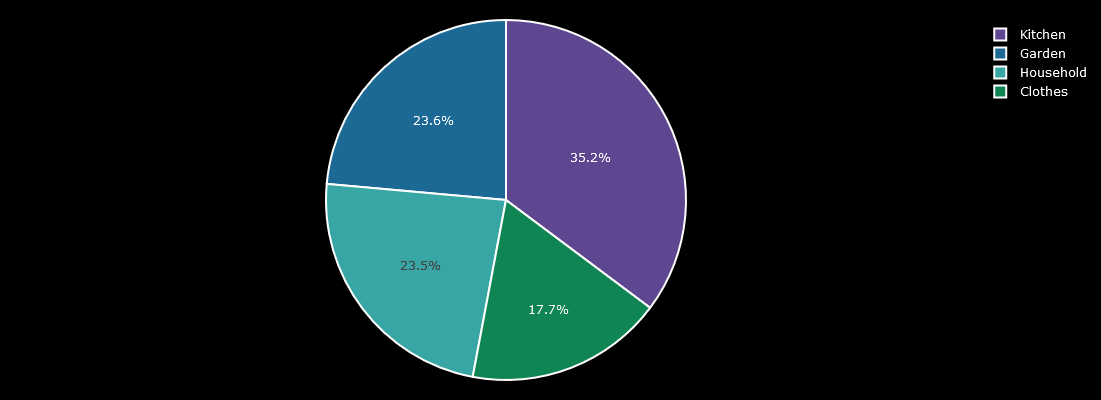

In [22]:
major_categories_fig = \
px.pie(major_categories_log, names='Major_Category', values='Total_Orders',
      color_discrete_sequence=px.colors.qualitative.Prism,
      width=600, height=400)

major_categories_fig.update_layout({'plot_bgcolor':'black', 'paper_bgcolor':'black',
                                    'font':{'size':12, 'color':'white'},
                                    'margin':{'l':50, 'r':50, 'b':20, 't':20}})

major_categories_fig.update_traces(marker_line_color='white', marker_line_width=2)

major_categories_fig.show()

<hr width=”300″, size=5> 

# Jupyter Dash dashboard app

<p> 
Packing the plots above into one:
</p>

## Sales dashboard: total sales & total orders

<p>
by country, month, categories with Jupyter Dash.
</p>

In [23]:
logo_path=\
'https://banner2.kisspng.com/20180330/ezq/kisspng-ferry-cruise-ship-desktop-wallpaper-clip-art-cruise-5abe534ac59e18.4151639915224226028095.jpg'

revenue_topten_countries_list =\
revenue_topten.sort_values(by='revenue', ascending = False)['Country'].unique().tolist()

# revenue_topten_countries_list 

In [24]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

app_quick_dashboard = JupyterDash(__name__)

app_quick_dashboard.layout = \
html.Div([
 
# Images in a local folder are not displayed easily
html.Img(src=logo_path,
         height=50, width=70),
html.H1('Total Sales Numbers', style={'margin-bottom':'100px'}),
    
# headers

html.Div(children=[
    
html.H2('Top ten countries by revenue without UK', 
        style={'display':'inline-block', 
               'text-align':'center', 
               'margin':'0px 900px 0px 0px'}),
html.H2('Total sales by month', 
        style={'display':'inline-block', 
               'text-align':'center', 
               'margin':'0px 0px 0px 600px'}) 
]),

# first row
html.Div(children=[
    
    dcc.Graph(id='top_ten_revenue', figure = top_ten_revenue_fig,
         style={'width':'700px', 'height':'400px', 'margin-bottom':'100px','paper_bgcolor':'black',
                'display':'inline-block'}),
    dcc.Graph(id='fig_sales_gb_month', figure = fig_sales_gb_month, 
              style={'width':'700px', 'height':'400px', 'display':'inline-block', 'margin-bottom':'100px'})
]),

    
html.H2('Total order by minor categories', 
        style={'display':'inline-block', 
               'text-align':'center', 
               'margin':'0px 700px 0px 0px'}),
html.H2('Total order sum by major categories', 
        style={'display':'inline-block', 
               'text-align':'center', 
               'margin':'0px 0px 0px -500px'}) 

,
    
# second row

html.Div(children=[dcc.Graph(figure=categories_fig, 
                   # css-styling
                   style={'width':'600px', 'height':'600', 'margin':0,
                         'display':'inline-block'}),
        
        dcc.Graph(figure=major_categories_fig,
                   style={'width':'600px', 'height':'600', 
                          'margin':0, 'display':'inline-block'})])

# style for the whole dashboard
    
], style = {'text-align':'center',
            'font-size':20,
            'color':'white',
            'paper_bgcolor':'black', 
            'background-color':'black',
            'border':'4px solid red'})

            
app_quick_dashboard.run_server(mode='external', debug =True, port=8058)

Dash app running on http://127.0.0.1:8058/
